In [2]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('Churn_Modelling/Churn_Modelling.csv')

In [4]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
## Separating dataset
x = df.iloc[:,3:13]
y = df.iloc[:,13]

In [6]:
##Feature Engineering

geography = pd.get_dummies(x['Geography'],drop_first=True).astype(int)
gender = pd.get_dummies(x['Gender'],drop_first=True).astype(int)

In [7]:
x = x.drop(['Geography','Gender'],axis=1)

In [8]:
x = pd.concat([x,geography,gender],axis=1)

In [9]:
##splitting the dataset into training and test set

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [10]:
##feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [11]:
X_train.shape,X_test.shape

((8000, 11), (2000, 11))

In [12]:
## ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ReLU,LeakyReLU,ELU,PReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [13]:
classifier = Sequential() ## ANN initialization
classifier.add(Dense(units=11,activation='relu')) ## adding input layer

classifier.add(Dense(units=7,activation='relu')) ##adding first hidden layer
classifier.add(Dropout(0.3))
classifier.add(Dense(units=6,activation='relu')) ##adding second hidden layer
classifier.add(Dropout(0.3))
classifier.add(Dense(1,activation='sigmoid')) ##adding the output layer

In [14]:
#for custom
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [15]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy']) # adam uses lr 0.01 by default

In [16]:
##early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    # start_from_epoch=0
)

In [17]:
model_hist = classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=500,callbacks=[early_stopping])

Epoch 1/500
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - accuracy: 0.7846 - loss: 0.5128 - val_accuracy: 0.7997 - val_loss: 0.4161
Epoch 2/500
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.8088 - loss: 0.4372 - val_accuracy: 0.8281 - val_loss: 0.3948
Epoch 3/500
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.8225 - loss: 0.4207 - val_accuracy: 0.8205 - val_loss: 0.3942
Epoch 4/500
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.8192 - loss: 0.4067 - val_accuracy: 0.8251 - val_loss: 0.3881
Epoch 5/500
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.8400 - loss: 0.3799 - val_accuracy: 0.8410 - val_loss: 0.3812
Epoch 6/500
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.8228 - loss: 0.3984 - val_accuracy: 0.8546 - val_loss: 0.3796
Epoch 7/500
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.8276 - loss: 0.3912 - val_accuracy: 0.8512 - val_loss: 0.3665
Epoch 8/500
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.8317 - loss: 0

In [18]:
model_hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 1.0, 'model accuracy')

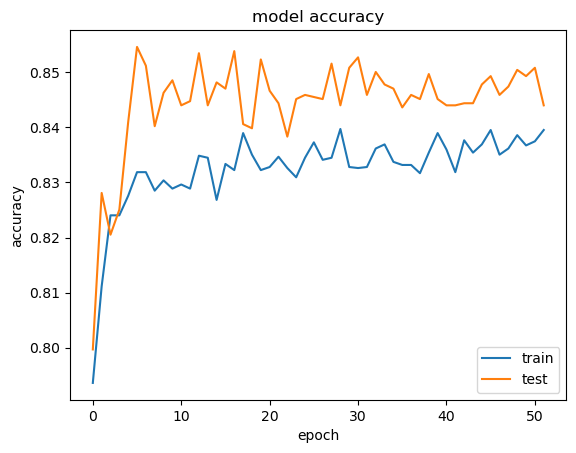

In [19]:
plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.title('model accuracy')

Text(0.5, 1.0, 'model loss')

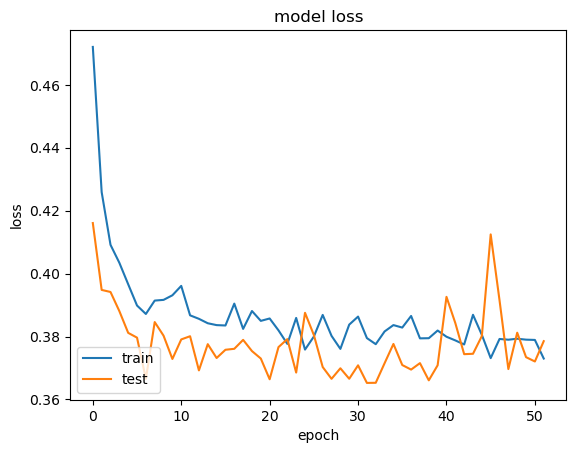

In [20]:
plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='lower left')
plt.title('model loss')

In [21]:
y_pred = classifier.predict(X_test)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step


In [22]:
y_pred = (y_pred >=0.5)

In [23]:
#calculate confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[1545,   50],
       [ 233,  172]])

In [24]:
#calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8585

In [25]:
classifier.get_weights()

[array([[-0.01181217,  0.82127947,  0.35754225,  1.1103443 , -0.48207745,
         -0.0403355 ,  0.24335319,  0.3506435 ,  0.01468357, -0.02892039,
         -0.9465081 ],
        [-0.12742998, -2.4909573 , -1.7931689 , -3.3967686 , -2.6443157 ,
         -4.318175  , -0.4963942 , -2.3814838 , -1.0909544 ,  1.5965018 ,
         -2.3973966 ],
        [-0.22174682, -0.519567  ,  1.1006126 , -0.8113819 ,  1.8215758 ,
         -0.24909972,  0.4693966 ,  0.4834184 , -0.2630243 , -0.19255383,
          0.99692565],
        [ 3.258717  ,  0.44456267, -1.7254888 , -0.721525  ,  1.0183566 ,
         -0.1591939 ,  0.80754495,  0.32447517, -1.3495607 ,  0.5429882 ,
          2.9129405 ],
        [ 2.9880104 , -0.53621304,  0.23756045,  0.15000284,  0.22638395,
         -2.2332218 ,  4.2901044 ,  1.4187968 , -4.954534  ,  0.41755182,
         -0.08257653],
        [ 0.30433595,  1.1102344 , -1.5141994 , -0.7342674 , -0.92872596,
         -0.71367145, -0.11816059, -0.23968107, -0.1908155 , -0.3125093